# 1 Import the dataset (Housing.csv) and look at the top five rows

In [1]:
import pandas as pd
df=pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# 2 Check the shape of the DataFrame (rows, columns)

In [3]:
shape=df.shape
shape


(545, 13)

# 3 Look at the data types of the columns

In [4]:
col_datatype=df.dtypes
col_datatype

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

# 4 Check for missing values if any, replace with appropriate values

In [12]:
 print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


# 5 prepare X (independent variables) and y (dependent variable)

In [14]:
# Separating the dependent and independent variables
X = df.drop('price', axis=1)  # Independent variables
y = df['price']  # Dependent variable

# Displaying the first few rows of X and y
X.head(), y.head()


(   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
 0  7420         4          2        3      yes        no       no   
 1  8960         4          4        4      yes        no       no   
 2  9960         3          2        2      yes        no      yes   
 3  7500         4          2        2      yes        no      yes   
 4  7420         4          1        2      yes       yes      yes   
 
   hotwaterheating airconditioning  parking prefarea furnishingstatus  
 0              no             yes        2      yes        furnished  
 1              no             yes        3       no        furnished  
 2              no              no        2      yes   semi-furnished  
 3              no             yes        3      yes        furnished  
 4              no             yes        2       no        furnished  ,
 0    13300000
 1    12250000
 2    12250000
 3    12215000
 4    11410000
 Name: price, dtype: int64)

# 6 Visualise the relationship between the independent variables and the depenedent variables

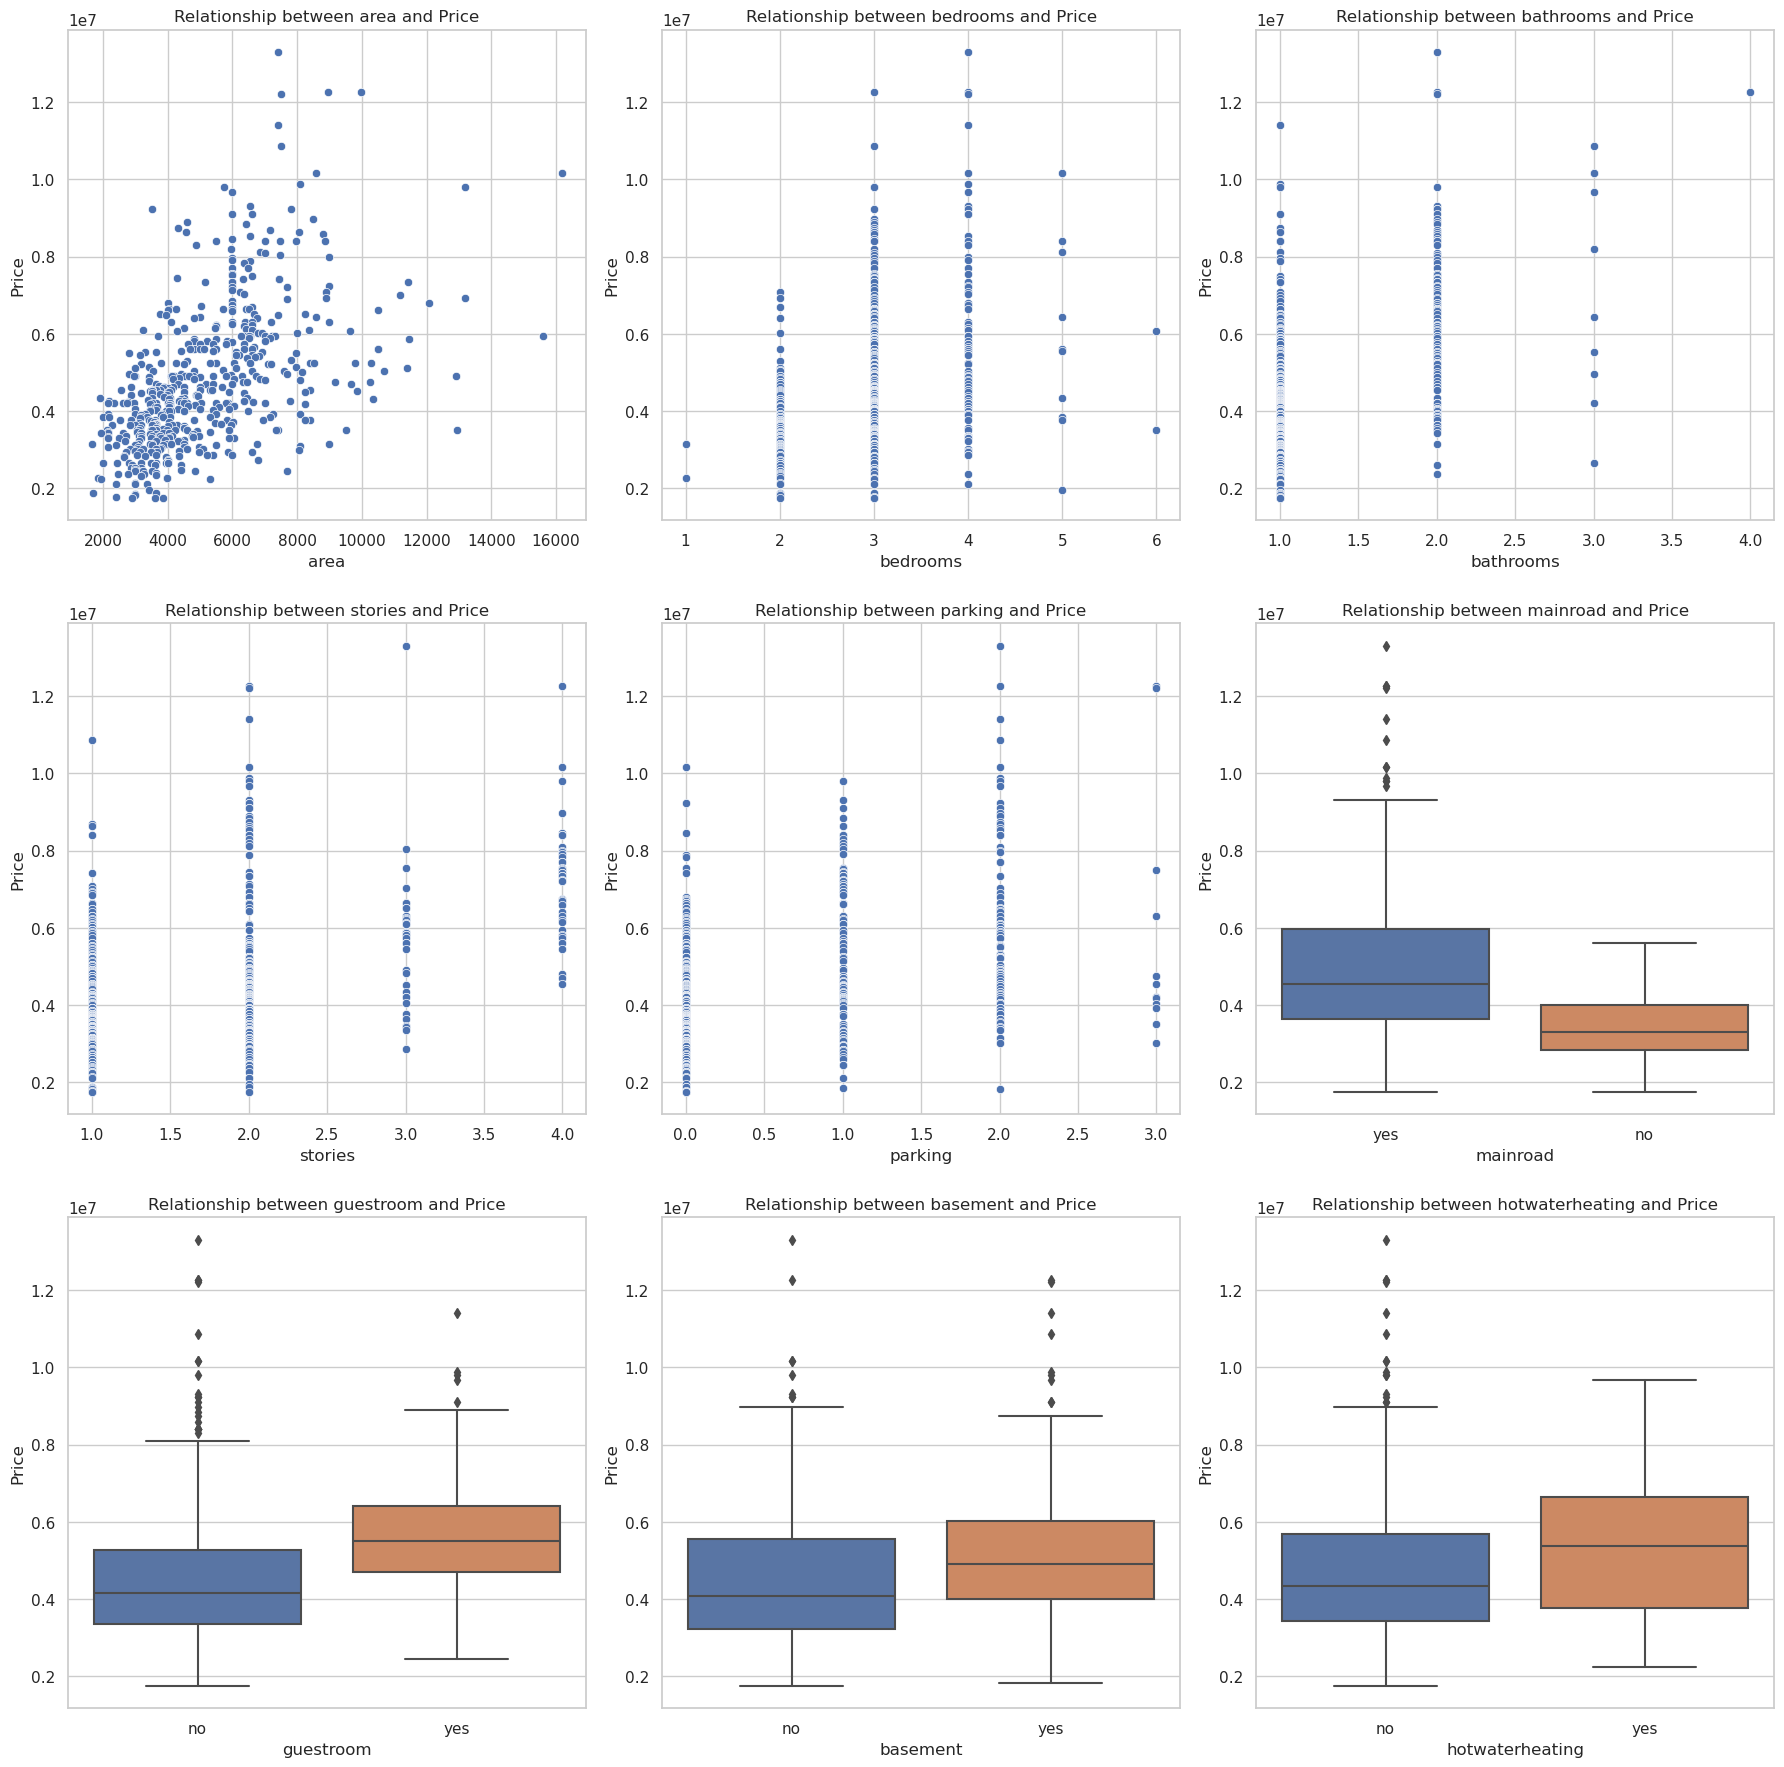

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Numeric features for scatter plots
numeric_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Categorical features for box plots
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Initialize the plot
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
axes = axes.flatten()

# Plotting numeric variables
for i, feature in enumerate(numeric_features):
    sns.scatterplot(data=df, x=feature, y='price', ax=axes[i])
    axes[i].set_title(f'Relationship between {feature} and Price')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Price')

# Plotting categorical variables
for i, feature in enumerate(categorical_features):
    if i + len(numeric_features) < len(axes):  # Ensure we don't exceed the available axes
        sns.boxplot(x=feature, y='price', data=df, ax=axes[i + len(numeric_features)])
        axes[i + len(numeric_features)].set_title(f'Relationship between {feature} and Price')
        axes[i + len(numeric_features)].set_xlabel(feature)
        axes[i + len(numeric_features)].set_ylabel('Price')

# Adjust layout
plt.tight_layout()
plt.show()


# 7 Encoding categorical data in X

In [18]:
# Apply One-Hot Encoding to categorical features in X
X_encoded = pd.get_dummies(X, drop_first=True)

# Display the first few rows of the encoded dataframe
X_encoded.head()


,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,7420,4,1,2,2,True,True,True,False,True,False,False,False


# 8 Avoiding the Dummy Variable Trap

In [19]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Housing.csv')

# Separating the dependent and independent variables
X = df.drop('price', axis=1)  # Independent variables
y = df['price']  # Dependent variable

# Apply One-Hot Encoding to categorical features in X and drop the first category to avoid the dummy variable trap
X_encoded = pd.get_dummies(X, drop_first=True)

# Display the first few rows of the encoded dataframe
X_encoded.head()


,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,7420,4,1,2,2,True,True,True,False,True,False,False,False


# 9 Apply feature scaling on numerical variables

In [21]:
from sklearn.preprocessing import StandardScaler

# List of numeric features
numeric_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Initialize the StandardScaler
scaler = StandardScaler()
#StandardScaler(): Standardizes the features by removing the mean and scaling to unit variance.
#fit_transform(): Fits the scaler to the data and transforms it in one step.
# Apply scaling only to the numeric features
X_scaled = X_encoded.copy()
X_scaled[numeric_features] = scaler.fit_transform(X_scaled[numeric_features])

# Display the first few rows of the scaled data
X_scaled.head()


,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.046726,1.403419,1.421812,1.378217,1.517692,True,False,False,False,True,True,False,False
1,1.757010,1.403419,5.405809,2.532024,2.679409,True,False,False,False,True,False,False,False
2,2.218232,0.047278,1.421812,0.224410,1.517692,True,False,True,False,False,True,True,False
3,1.083624,1.403419,1.421812,0.224410,2.679409,True,False,True,False,True,True,False,False
4,1.046726,1.403419,-0.570187,0.224410,1.517692,True,True,True,False,True,False,False,False


# 10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train,

In [22]:
from sklearn.model_selection import train_test_split

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((381, 12), (164, 12), (381,), (164,))

# 11 Fitting Multiple Linear Regression to the Training

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 2: Initialize the Multiple Linear Regression model
model = LinearRegression()

# Step 3: Train the model on the training data
model.fit(X_train, y_train)

# Step 4: Predict the results on the test set
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

#train_test_split(): This splits the data into training and testing sets, with 80% for training and 20% for testing (test_size=0.2).
#LinearRegression(): This creates the multiple linear regression model.
#fit(): This trains the model using the training data (X_train, y_train).
#predict(): This generates predictions on the test set (X_test).
#mean_squared_error() and r2_score(): These evaluate the model’s performance.

Mean Squared Error: 1754318687330.669
R-squared: 0.6529242642153175


# 12 Predict on the train set and calculate the error = y_pred - y_train

In [25]:
# Predict on the training set
y_train_pred = model.predict(X_train)

# Calculate the error
train_error = y_train_pred - y_train

# Display the first few values of the error
train_error.head()


46    -415834.161301
93     582951.804343
335    895249.786349
412    560061.645380
471    228924.341063
Name: price, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Step 1: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Step 2: Initialize and train the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Predict on the training set
y_train_pred = model.predict(X_train)

# Step 4: Calculate the error (y_pred - y_train)
train_error = y_train_pred - y_train

# Display the first few values of the error
train_error.head()


46    -415834.161301
93     582951.804343
335    895249.786349
412    560061.645380
471    228924.341063
Name: price, dtype: float64

# 13 Residual plot - plot y_pred in x axis and errors in y axis

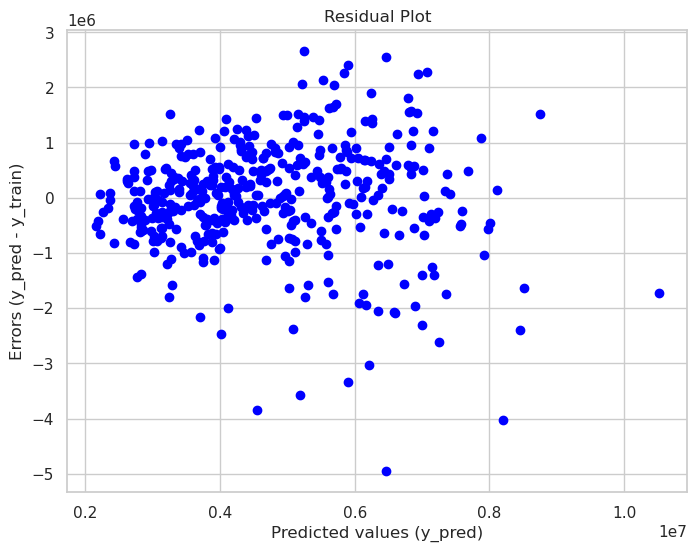

In [27]:
import matplotlib.pyplot as plt

# Step 1: Create the residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_train_pred, train_error, color='blue')

# Step 2: Add labels and title
plt.title('Residual Plot')
plt.xlabel('Predicted values (y_pred)')
plt.ylabel('Errors (y_pred - y_train)')

# Show the plot
plt.show()


# 14 Predic on the test set

In [28]:
# Predict on the test set
y_test_pred = model.predict(X_test)

# Display the first few predicted values
y_test_pred[:5]


array([5164653.90033967, 7224722.29802166, 3109863.24240338,
       4612075.32722559, 3294646.25725955])

# 15 Residual plot - plot y_pred in x axis and errors in y axis

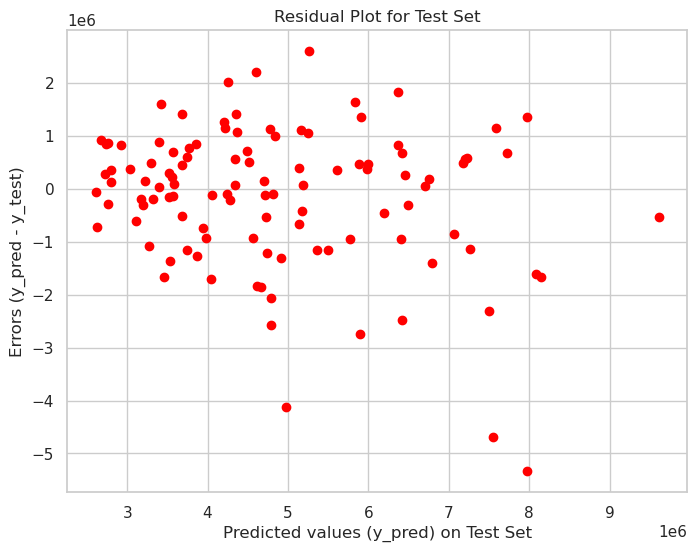

In [29]:
# Calculate the errors on the test set
test_error = y_test_pred - y_test

# Create the residual plot for the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, test_error, color='red')

# Add labels and title
plt.title('Residual Plot for Test Set')
plt.xlabel('Predicted values (y_pred) on Test Set')
plt.ylabel('Errors (y_pred - y_test)')

# Show the plot
plt.show()


# 16 Print Mean Squared Error and R Squared Value

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error and R-squared for the test set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print the results
print(f"Mean Squared Error (MSE) on Test Set: {mse_test}")
print(f"R-squared Value on Test Set: {r2_test}")


Mean Squared Error (MSE) on Test Set: 1754318687330.6646
R-squared Value on Test Set: 0.6529242642153182


# 17 Check Adjusted R Squared Value(by selecting different no of input variables instead of all)

In [31]:
import numpy as np

# Function to calculate Adjusted R-squared
def adjusted_r2(r2, n, p):
    return 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

# Calculate R-squared for the model with all features
r2_all = r2_score(y_test, y_test_pred)

# Number of observations and features
n = len(X_train)
p_all = X_train.shape[1]

# Calculate Adjusted R-squared for all features
adj_r2_all = adjusted_r2(r2_all, n, p_all)

# Print the Adjusted R-squared value
print(f"Adjusted R-squared for all features: {adj_r2_all}")


Adjusted R-squared for all features: 0.6422323576627096
